# Logarithmic and exponential transform of an image

<small>Author: Fernando Carlos López Hernández</small>
<p>This notebook shows how to perform the logarigmic and exponential transform to best distribute the dynamic range of an image

In [1]:
import matplotlib.pyplot as plt
import numpy as np

We load the underexposed image, apply the <b>logarithmic transform</b> and show the result. You can use <code>alpha</code> parameter to change the curvature of the logarithm function

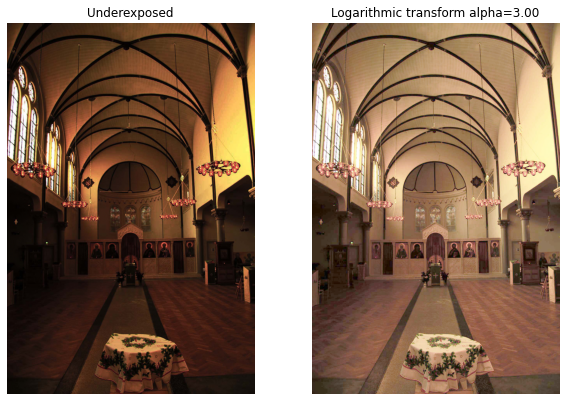

In [2]:
X = plt.imread('church.jpg').astype('double')/255.0
alpha = 3
max_r = np.max(X, axis = (0,1)) # Compute the maximum for each input RGB channel
max_s = np.array([1.0, 1.0, 1.0]) # The output RGB channels are stretched to the maximum
c = max_s / ( np.log(1.0+(np.exp(alpha)-1)*max_r) )
Y = c*np.log(1+(np.exp(alpha)-1)*X)
plt.rcParams['figure.figsize'] = [10, 15]
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(X); plt.title('Underexposed')
plt.subplot(2,2,2)
plt.axis('off')
plt.imshow(Y); plt.title('Logarithmic transform alpha=%.2f' % alpha);

We load and show underexposed image, apply the <b>exponential transform</b> and show the result. You can use <code>alpha</code> parameter to change the curvature of the exponential function
<p>Warning: For practical reasons X is normalized to the range 0.0 .. 1.0 to avoid an overflow calculating (1+alpha)**X

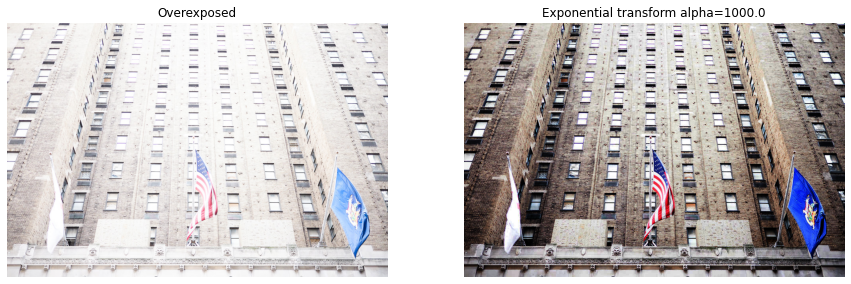

In [3]:
X = plt.imread('empire.jpg').astype('double')/255.0
alpha = 1000
max_r = np.max(X, axis = (0,1)) # Compute the maximum for each input RGB channel
max_s = np.array([1.0, 1.0, 1.0]) # The output RGB channels are stretched to the maximum
c = max_s / ((1+alpha)**max_r-1)
Y = c*((1+alpha)**X-1)
plt.rcParams['figure.figsize'] = [15, 15]
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(X); plt.title('Overexposed')
plt.subplot(2,2,4)
plt.axis('off')
plt.imshow(Y); plt.title('Exponential transform alpha=%.1f' % alpha);